In [1]:
import numpy as np
import matplotlib.pyplot as plt
from point_history import getmes
import pickle
import datetime
from get_point_map import get
from get_point_history import pget
from netCDF4 import Dataset
import pandas as pd
from progressbar import ProgressBar
import copy

In [2]:
%matplotlib notebook

In [3]:
path='../../../tmp2/'

In [4]:
basename='med'

In [5]:
with open(path+'med.pkl', 'r') as f:
    ptr=pickle.load(f)

In [6]:
t1='20160620.00'

In [7]:
t2='20160620.00'

In [8]:
sdate=datetime.datetime.strptime(t1,'%Y%m%d.%H')

In [9]:
edate=datetime.datetime.strptime(t2,'%Y%m%d.%H')

In [10]:
hdata=Dataset('../../../tmp2/6/20/00/trih-med.nc')

In [11]:
#pbar=ProgressBar(maxval=len(ptr) or None).start()

In [12]:
rt=[]
hs=[]
mt=[]
mh=[]
ht=[]
hh=[]
tota=[]
lats=[]
lons=[]
i=1
pk=[]
for n in ptr.keys():
    #print n
    #pbar.update(i)
    t,s,plat,plon = getmes(sdate,edate,n)
    rt.append(t)
    hs.append(s)
    pk.append(n)
    lats.append(plat)
    lons.append(plon)
    dic0={'t_gauge':t, 's':s}
    data0=pd.DataFrame(dic0)
    data0=data0.set_index('t_gauge')
    tcw,cw=get(t1,t2,path,basename,plat,plon)
    mt.append(tcw)
    mh.append(cw)
    dic1={'t_map':tcw, 's_map':cw}
    data1=pd.DataFrame.from_dict(dic1)
    data1=data1.set_index('t_map')
    data=data0.join(data1, how='outer')
    hcw,hw=pget(t1,t2,path,basename,ptr[n])
    ht.append(hcw)
    hh.append(hw)
    dic2={'t_his':hcw, 's_his':hw}
    data2=pd.DataFrame.from_dict(dic2)
    data2=data2.set_index('t_his')
    data=data.join(data2, how='outer')
    tota.append(data)
    i+=1

## read grid

In [13]:
from grid import *

In [14]:
grd=Grid.fromfile(path+'med.grd')

In [15]:
obsp=pd.read_csv(path+'med.obs', header=None, names=['idx','i','j'],delim_whitespace =True, engine='python')

In [16]:
obsp=obsp.set_index('idx')

In [17]:
obsp.head()

,i,j
idx,,
819,117,192
833,7,107
834,205,158
884,4,114
899,203,225


In [18]:
obsp['lon']=grd.x.T[obsp['i']-1,obsp['j']-1] # fortran / python convention

In [19]:
obsp['lat']=grd.y.T[obsp['i']-1,obsp['j']-1]

In [20]:
obsp.head()

,i,j,lon,lat
idx,,,,
819,117,192,2.249311,41.278169
833,7,107,-5.099174,35.591549
834,205,158,8.128099,39.003521
884,4,114,-5.299587,36.059859
899,203,225,7.994490,43.485915


In [21]:
ptr0={}
for k,a,b in zip(pk,lons,lats):
    ptr0[k]=[a,b]

In [22]:
ptrdb=pd.DataFrame(ptr0)

In [23]:
ptrdb=ptrdb.T

In [24]:
ptrdb.columns=['lon buoy','lat buoy']

In [25]:
ptrdb.head()

,lon buoy,lat buoy
819,2.160,41.340
833,-5.190,35.540
834,8.183,39.084
884,-5.350,36.130
899,8.011,43.524


In [26]:
ptrdb.shape

(231, 2)

In [27]:
obsp.head()

,i,j,lon,lat
idx,,,,
819,117,192,2.249311,41.278169
833,7,107,-5.099174,35.591549
834,205,158,8.128099,39.003521
884,4,114,-5.299587,36.059859
899,203,225,7.994490,43.485915


In [28]:
obsp.shape

(144, 4)

In [29]:
anal=obsp.join(ptrdb,how='outer')

In [30]:
anal.head()

,i,j,lon,lat,lon buoy,lat buoy
819,117.0,192.0,2.249311,41.278169,2.160,41.340
833,7.0,107.0,-5.099174,35.591549,-5.190,35.540
834,205.0,158.0,8.128099,39.003521,8.183,39.084
884,4.0,114.0,-5.299587,36.059859,-5.350,36.130
899,203.0,225.0,7.994490,43.485915,8.011,43.524


In [31]:
anal[['lon','lat','lon buoy','lat buoy']] = anal[['lon','lat','lon buoy','lat buoy']].apply(pd.to_numeric)

In [32]:
anal['dlon']=anal['lon buoy']-anal['lon']

In [33]:
anal['dlat']=anal['lat buoy']-anal['lat']

In [34]:
anal.head()

,i,j,lon,lat,lon buoy,lat buoy,dlon,dlat
819,117.0,192.0,2.249311,41.278169,2.160,41.340,-0.089311,0.061831
833,7.0,107.0,-5.099174,35.591549,-5.190,35.540,-0.090826,-0.051549
834,205.0,158.0,8.128099,39.003521,8.183,39.084,0.054901,0.080479
884,4.0,114.0,-5.299587,36.059859,-5.350,36.130,-0.050413,0.070141
899,203.0,225.0,7.994490,43.485915,8.011,43.524,0.016510,0.038084


In [35]:
anal.dlon.abs().max()

0.099421499999998275

In [55]:
anal.dlon.idxmax()

1524

In [56]:
ptr[1524]

37

In [36]:
anal.dlat.abs().max()

0.10007039999999989

In [53]:
anal.dlat.idxmax()

1667

In [57]:
ptr[1667]

53

In [54]:
anal.xs(1667)

i           567.000000
j            93.000000
lon          32.311295
lat          34.654930
lon buoy     32.409000
lat buoy     34.755000
dlon          0.097705
dlat          0.100070
Name: 1667, dtype: float64

## PLOT

In [37]:
tota=pd.concat(tota, keys=ptr.keys())

In [38]:
tota[['s','s_map','s_his']] = tota[['s','s_map','s_his']].apply(pd.to_numeric)

In [58]:
point=1667

<IPython.core.display.Javascript object>


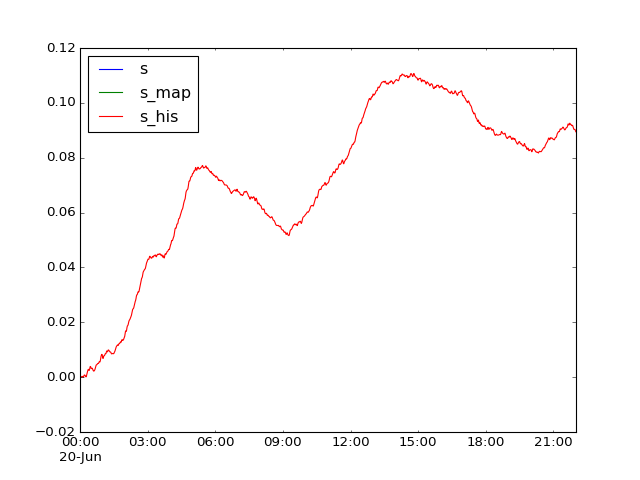

In [59]:
ax=tota.xs(point).plot()

In [62]:
tota.xs(point).head()

,s,s_map,s_his
2016-06-20 00:00:00,NaN,0.0,0.000000
2016-06-20 00:01:00,NaN,NaN,0.000081
2016-06-20 00:02:00,NaN,NaN,0.000094
2016-06-20 00:03:00,NaN,NaN,-0.000044
2016-06-20 00:04:00,NaN,NaN,0.000002


In [ ]:
ax1=tota.xs(point)['s'][np.isfinite(tota.unstack().xs(point)['s'])].plot()
tota.xs(point)['s_his'][np.isfinite(tota.unstack().xs(point)['s_his'])].plot(ax=ax1)
tota.xs(point)['s_map'][np.isfinite(tota.unstack().xs(point)['s_map'])].plot(ax=ax1,style='ro')

ax1.legend(loc=0)

In [42]:
obs=tota.xs(point)['s']

In [43]:
ma = obs.rolling(60).mean()

In [44]:
mstd = obs.rolling(60).std()

<IPython.core.display.Javascript object>


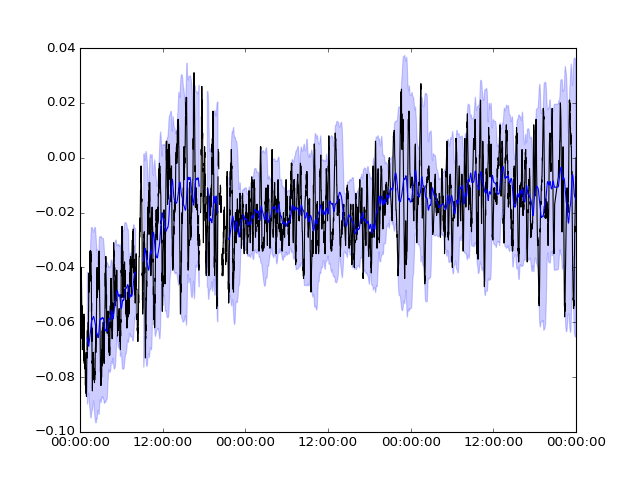

In [45]:
plt.figure()
plt.plot(obs.index, obs, 'k')
plt.plot(ma.index, ma, 'b')
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)

In [46]:
from pandas.tools.plotting import bootstrap_plot

In [47]:
data=tota.xs(point)['s'][np.isfinite(tota.unstack().xs(point)['s'])].reset_index(drop=True)

<IPython.core.display.Javascript object>


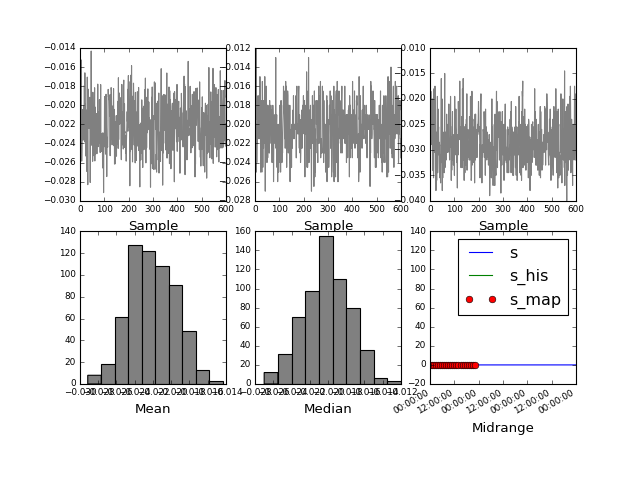

<IPython.core.display.Javascript object>


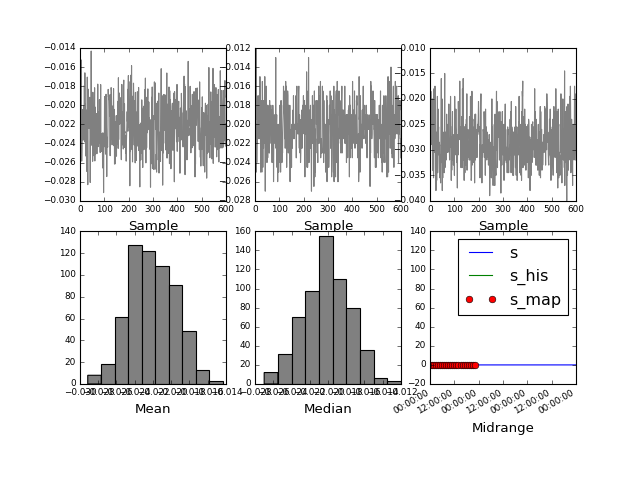

In [48]:
bootstrap_plot(data, size=60, samples=600, color='grey')